In [24]:
import csv
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
file = open('./Tilt_tolerance.csv','r')
rdr = csv.reader(file)
prompt = float(0)
var = [0,-0.004,-0.002,0.002,0.004] #Put the proper set value in front. This may be Rrod, Hrod, Tilt angle etc. Write all the cases.
dt = np.zeros((len(var),9), dtype=object) # Angle / Freq / C / Gtot / Grod
data = dict(zip(var,dt))

for line in rdr:
   for v in var:
      if(float(line[1]) == float(v) and float(line[4])>0.05): 
         #print(float(line[0]))
         data[v][0] = np.append(data[v][0],float(line[0]))
         data[v][1] = np.append(data[v][1],float(line[2]))
         data[v][2] = np.append(data[v][2],float(line[4]))
         data[v][3] = np.append(data[v][3],float(line[-2]))
         data[v][4] = np.append(data[v][4],float(line[-1]))
for v in var:
    for i in range (5):
      data[v][i] = data[v][i][1:]
print(data[0])

[array([  0.,   0.,   5.,   5.,  10.,  15.,  20.,  25.,  30.,  35.,  40.,
         45.,  50.,  55.,  60.,  65.,  70.,  75.,  80.,  85.,  90.,  95.,
        100., 105., 110., 115., 120., 125., 130., 135., 140., 145., 150.,
        155., 160., 165., 170., 175., 180.])
 array([1.5037, 1.5212, 1.5038, 1.5221, 1.5247, 1.5289, 1.535 , 1.5427,
        1.5518, 1.5624, 1.574 , 1.5867, 1.6002, 1.6145, 1.6294, 1.6446,
        1.6601, 1.6758, 1.6913, 1.7067, 1.7219, 1.7364, 1.7506, 1.7645,
        1.7773, 1.7895, 1.8009, 1.8114, 1.8207, 1.8292, 1.8368, 1.8436,
        1.8494, 1.8542, 1.8581, 1.8613, 1.8634, 1.8646, 1.8649])
 array([0.057456, 0.71851 , 0.051616, 0.72431 , 0.73496 , 0.74629 ,
        0.75302 , 0.75975 , 0.76216 , 0.76297 , 0.7621  , 0.7609  ,
        0.75898 , 0.75678 , 0.75465 , 0.75207 , 0.74944 , 0.74679 ,
        0.74388 , 0.74124 , 0.73881 , 0.73542 , 0.73281 , 0.73103 ,
        0.7289  , 0.72683 , 0.72524 , 0.724   , 0.72196 , 0.72066 ,
        0.7199  , 0.7195  , 0.71919 , 0.

In [25]:
def cube(x,a,b,c,d):
   return a*np.power(x,3)+b*np.power(x,2)+c*np.power(x,1)+d
def quad(x,a,b,c):
   return a*np.power(x,2)+b*np.power(x,1)+c

if (type(data[v][-2])==int):
   for v in var:
      x = data[v][1] #frequency
      y1 = data[v][2] #C
      y2 = data[v][3] #Qtot
      y3 = data[v][4] #Qrod
      popt_C, pcov_C = curve_fit(cube,x,y1)
      popt_Qtot, pcov_Qtot = curve_fit(quad,x,y2)
      popt_Qrod, pcov_Qrod = curve_fit(quad,x,y3)
      data[v][-3] = np.append(data[v][-3],popt_C)
      data[v][-3] = data[v][-3][1:]
      data[v][-2] = np.append(data[v][-2],popt_Qtot)
      data[v][-2] = data[v][-2][1:]
      data[v][-1] = np.append(data[v][-1],popt_Qrod)
      data[v][-1] = data[v][-1][1:]
#print(data[0])

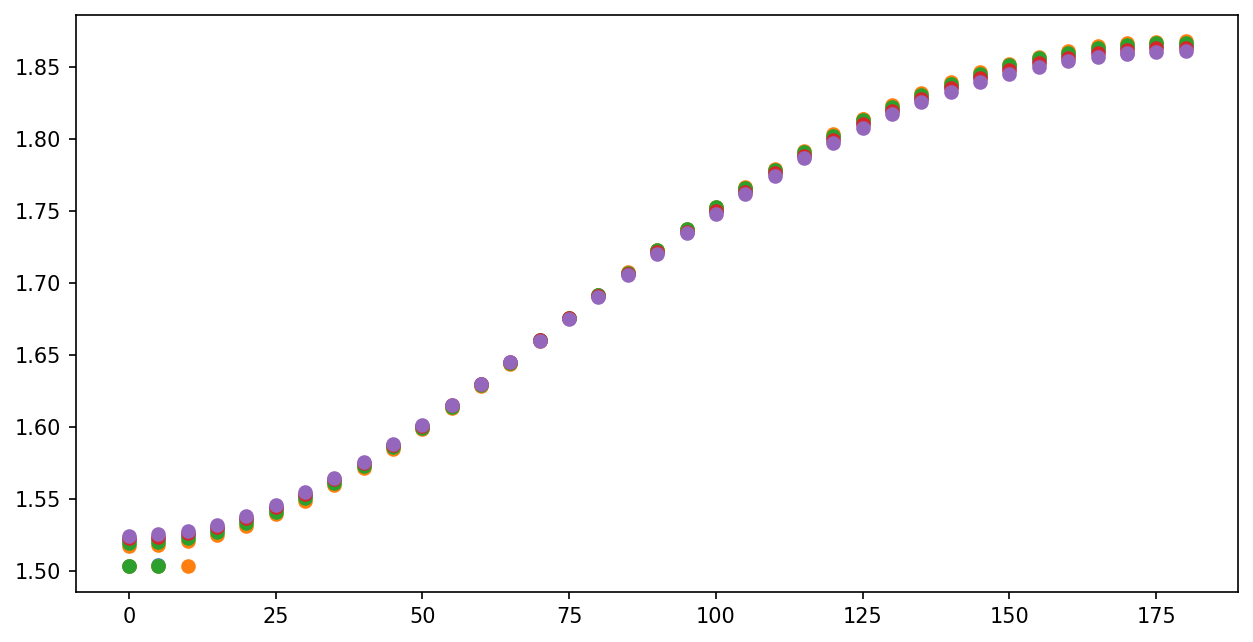

In [26]:
fig,axs = plt.subplots(1,1,figsize=(10,5),dpi=150)
for v in var:
   angle = data[v][0]
   freq = data[v][1]
   axs.plot(angle,freq,'o')


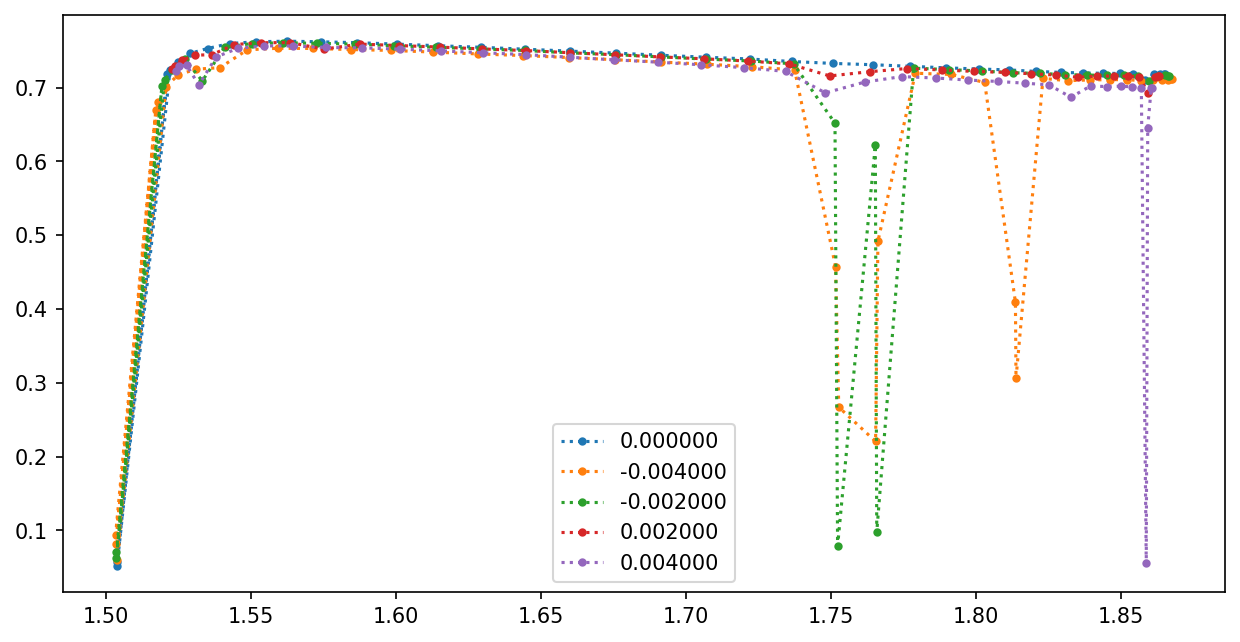

In [37]:
fig,axs = plt.subplots(1,1,figsize=(10,5),dpi=150)
#p_error = np.zeros(1)
#n_error = np.zeros(1)
for v in var:
   if (1):
      freq = data[v][1] # freq of prompt
      pmt = data[v][2] # C of prompt
      label = '%f' % v
      axs.plot(freq,pmt,'.:',label=label)
axs.legend()

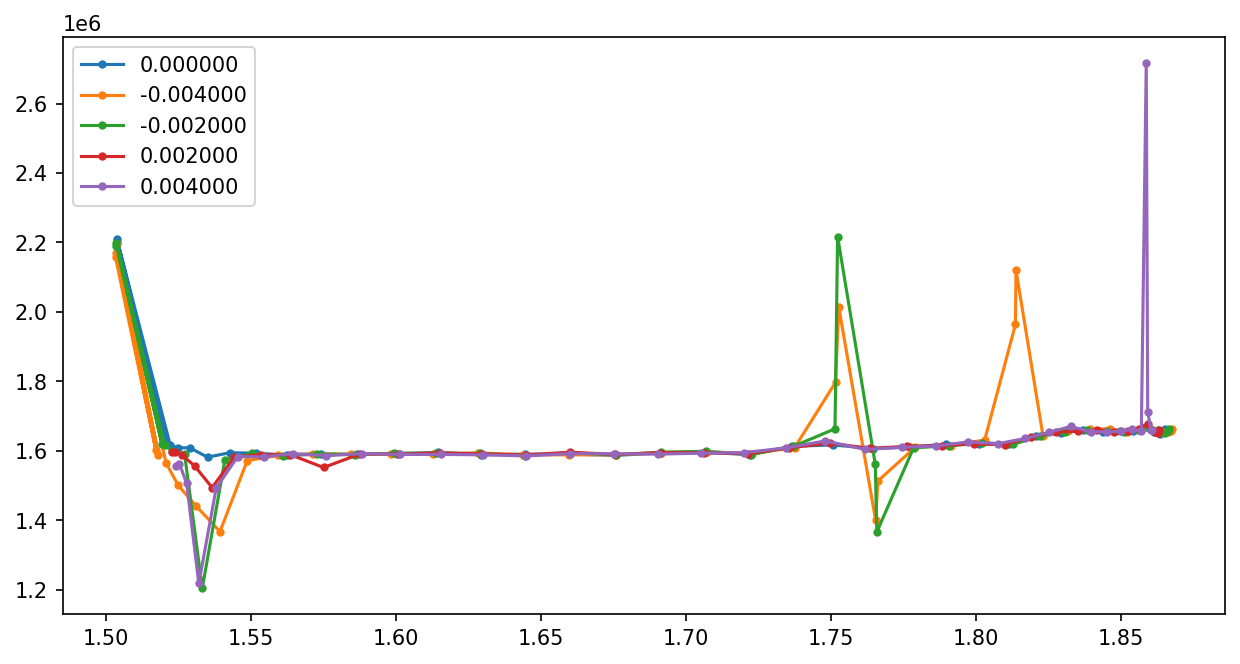

In [34]:
fig,axs = plt.subplots(1,1,figsize=(10,5),dpi=150)
#p_error = np.zeros(1)
#n_error = np.zeros(1)
for v in var:
   if (1):
      freq = data[v][1] # freq of prompt
      pmt = data[v][3] # Qtot of prompt
      label = '%f' % v
      axs.plot(freq,pmt,'.-',label=label)
axs.legend()

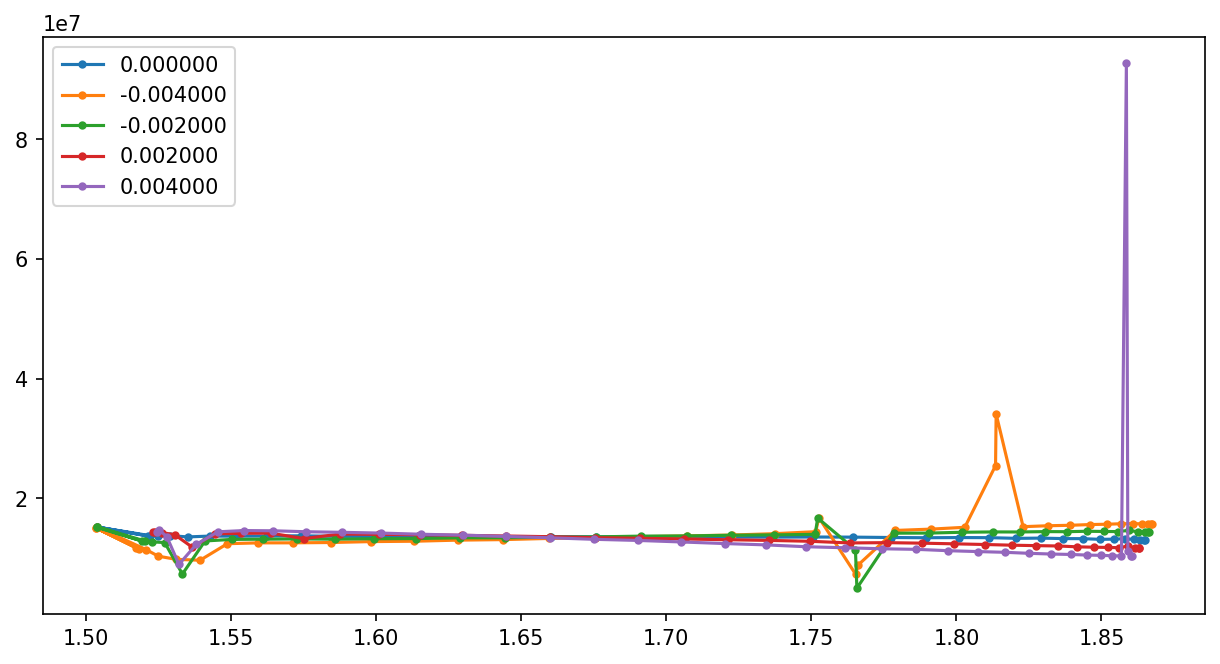

In [35]:
fig,axs = plt.subplots(1,1,figsize=(10,5),dpi=150)
#p_error = np.zeros(1)
#n_error = np.zeros(1)
for v in var:
   if (1):
      freq = data[v][1] # freq of prompt
      pmt = data[v][4] # Qtot of prompt
      label = '%f' % v
      axs.plot(freq,pmt,'.-',label=label)
axs.legend()